<a href="https://colab.research.google.com/github/Mahenaz17595/Rossman-Sales-Prediction/blob/master/Rossmann_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Packages**

In [1]:
!pip3 install plotly==2.7.0

     |████████████████████████████████| 25.0MB 4.6MB/s 
  Created wheel for plotly: filename=plotly-2.7.0-cp36-none-any.whl size=25015297 sha256=cebbdd4928a3a3f292f80e36670379b7b95a19ad538d5fb1935f887aac87b504
  Stored in directory: /root/.cache/pip/wheels/0c/3e/07/4848195c61f659184ca41d5a614845a018ab2d2f2a705b9998
Successfully built plotly
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 2.7.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly 
import plotly.graph_objs as go
import plotly.plotly as py
#import chart_studio.plotly as py
import sklearn
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**2. Data Preparation**

**2.1 Load Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
url_store = '/content/drive/My Drive/Project_3/Dataset/store.csv'
store = pd.read_csv(url_store)

url_train = '/content/drive/My Drive/Project_3/Dataset/train.csv'
train = pd.read_csv(url_train,parse_dates = True, index_col = 'Date')

In [5]:
print("# of observations & # of features", train.shape)
train.head()

# of observations & # of features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [6]:
print("# of observations & # of features", store.shape)
store.head()

# of observations & # of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**2.2 Dealing With Missing Values**

**2.2.1 Count missing values in each dataset**

In [7]:
print("train:\n\n", train.isnull().sum(),  
     "\n\nstore:\n\n", store.isnull().sum())

train:

 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

store:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


**2.2.2 Remove features with high percentages of missing values**

we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [0]:
# remove features
store = store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)


**2.2.3 Replace missing values in features with low percentages of missing values**


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

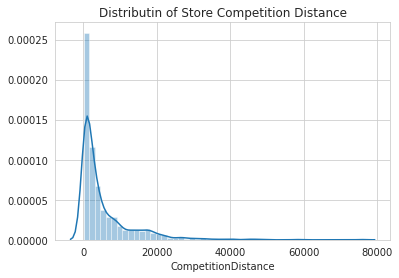

In [9]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

**The distribution is right skewed, so we'll replace missing values with the median.**

In [0]:
# replace missing values in CompetitionDistance with median for the store dataset
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)

**2.3 Date Extraction**

In [0]:
# extract year, month, day and week of year from "Date"
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train = train.reset_index()


**`2.4 Joining Tables`**

In [12]:
df = pd.merge(train, store, how='left', on='Store')
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [13]:
len(df)

1017209


**2.5 Drop Subsets Of Data Where Might Cause Bias**

In [0]:
# where stores are closed, they won't generate sales, so we will remove this part of the dataset
df = df[df.Open != 0]

In [0]:
# Open isn't a variable anymore, so we'll drop it
df = df.drop('Open', axis=1)

In [16]:
# see if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [17]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [0]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

**2.6 Feature Engineering**

In [19]:
# see what variable types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Store                844338 non-null  int64         
 2   DayOfWeek            844338 non-null  int64         
 3   Sales                844338 non-null  int64         
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  object        
 7   SchoolHoliday        844338 non-null  int64         
 8   Year                 844338 non-null  int64         
 9   Month                844338 non-null  int64         
 10  Day                  844338 non-null  int64         
 11  WeekOfYear           844338 non-null  int64         
 12  StoreType            844338 non-null  object        
 13  Assortment   

In [20]:
# see what's in nominal varibles 
set(df.StateHoliday), set(df.StoreType), set(df.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [0]:
# StateHoliday indicates a state holiday - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# convert number 0 to string 0
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [0]:
# make a copy in case I mess up anything 
df1 = df.copy()

**2.6.1 Create new variable "AvgSales"**

create a variable that calculates monthly average sales for each store

In [0]:
# calculate weekly average sales
sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

In [0]:
df1['sales_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

In [0]:
# drop extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)
# merge
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))

**2.6.2 Create new variable "AvgCustomer"**

create a variable that calculates Monthly average number of customers for each store, becuase daily number of customer is another variable to be predicted

In [0]:
# calculate weekly average
cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [0]:
df1['cust_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [0]:
# drop original feature Customers
df1 = df1.drop('Customers', axis=1)# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [0]:
# merge
df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

**2.6.3 Transform Variable "StateHoliday"**

In [0]:
# 0 - not a state holiday; 1- is on a state holiday
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [0]:
# drop extra columns
df1 = df1.drop(['cust_key','sales_key','Store','Date'], axis=1)

**3. Exploratory Data Analysis**

In [0]:
# becasue my computer keeps crashing, I had to sample the dataset 
dfv = df.sample(n=5000, random_state=1)

In [33]:
import getpass

APIKEY = getpass.getpass()

··········


In [0]:
# set up credential file for plotly
plotly.tools.set_credentials_file(username='17wh1a0595', api_key='xW6238B6m3qBLte8o39r')

**3.1 Correlation Heatmap**

create a heatmap to see correlation between all variables

In [0]:
corr = df1.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

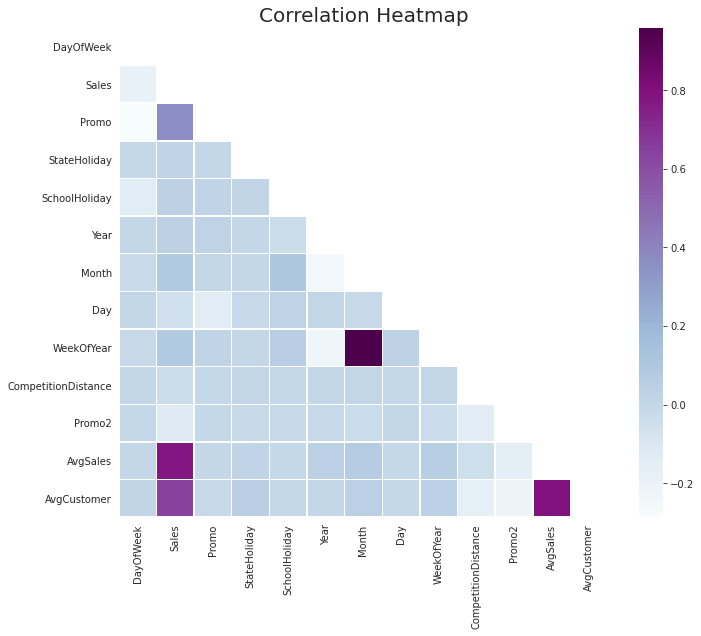

In [36]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)


**3.2 Sales Distribution**


In [37]:
sales_dist = [go.Histogram(x=df.Sales, marker=dict(color='pink'))]
layout2 = go.Layout(title='Sales Distribution', xaxis=dict(title='daily sales in $'), yaxis=dict(title='number of observations'))
fig2 = go.Figure(data=sales_dist, layout=layout2)
py.iplot(fig2)

**3.3 Customer Distribution**

In [38]:
cust_dist = [go.Histogram(x=df.Customers, marker=dict(color=('rgb(158,202,225')))]
layout3 = go.Layout(title='Customer Distribution', 
                   xaxis=dict(title='daily total number of customers'), yaxis=dict(title='number of observations'))
fig3 = go.Figure(data=cust_dist, layout=layout3)
py.iplot(fig3)


**3.4 Sales Over Time**

In [0]:
store1_2015 = df.query('Store == 1 and Year == 2015')
store1_2013 = df.query('Store == 1 and Year == 2013')
store1_2014 = df.query('Store == 1 and Year == 2014')

In [40]:
trace_2013 = go.Scatter(
                x=store1_2013.Date,
                y=store1_2013.Sales,
                name = "2013",
                opacity = 0.8)

trace_2014 = go.Scatter(
                x=store1_2014.Date,
                y=store1_2014.Sales,
                name = "2014",
                opacity = 0.8)

trace_2015 = go.Scatter(
                x=store1_2015.Date,
                y=store1_2015.Sales,
                name = "2015",
                opacity = 0.8)

data = [trace_2013,trace_2014, trace_2015]
layout = go.Layout(title='Sales Over Time', 
                   xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**3.5 Sales Over Days Of A Month**

In [41]:
day_s = [go.Scatter(x=dfv.Day, y=dfv.Sales, mode='markers', 
                    marker=dict(size=15, color=dfv.Customers, colorbar=dict(title='Number Of Customers'),))]
layout5 = go.Layout(title='Sales Over Days Of A Month', 
                   xaxis=dict(title='Day Of Month'), yaxis=dict(title='Total Sales'))
fig5 = go.Figure(data=day_s, layout=layout5)
py.iplot(fig5)

**3.6 Sales Over Weeks**

In [42]:
trace = go.Bar(x=dfv.WeekOfYear,
                y=dfv.Sales,
                name = "WeekOfYear", marker=dict(color=dfv.WeekOfYear, colorscale='Jet'))

data = [trace]
layout = go.Layout(title='Sales Over Week Of Year', 
                   xaxis=dict(title='Week Of Year'), yaxis=dict(title='Sales'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



In [43]:
day_w = [go.Bar(x=dfv.DayOfWeek, y=dfv.Sales, 
                marker=dict(color=dfv.DayOfWeek,
                            colorscale ='Viridis'))]
layout6 = go.Layout(title='Sales Over Days Of A Week', 
                   xaxis=dict(title='Day Of Week'), yaxis=dict(title='Total Sales'))
fig6 = go.Figure(data=day_w, layout=layout6)
py.iplot(fig6)

**3.7 Sales By Store Type**

In [44]:
# StoreType - differentiates between 4 different store models: a, b, c, d
s_type = [go.Box(x=dfv.StoreType, y=dfv.Sales,
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout7 = go.Layout(title='Sales By Store Type', 
                   xaxis=dict(title='Store Type'), yaxis=dict(title='Total Sales'))
fig7 = go.Figure(data=s_type, layout=layout7)
py.iplot(fig7)

**3.8 Sales By Assortment**

In [45]:
# Assortment - describes an assortment level: a = basic, b = extra, c = extended
s_assort = [go.Box(x=dfv.Assortment, y=dfv.Sales,marker=dict(color='green'), 
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout8 = go.Layout(title='Sales By Assortment', 
                   xaxis=dict(title='Assortment'), yaxis=dict(title='Total Sales'))
fig8 = go.Figure(data=s_assort, layout=layout8)
py.iplot(fig8)

**3.9 Sales By Promotion**

In [49]:
s_promo = [go.Box(x=dfv.Promo, y=dfv.Sales,marker=dict(color='purple'), 
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout11 = go.Layout(title='Sales By Promotion', 
                   xaxis=dict(title='Promotion(0-No Promotion; 1-Promotion Period)'), yaxis=dict(title='Total Sales'))
fig11 = go.Figure(data=s_promo, layout=layout11)
py.iplot(fig11)

In [0]:
promo0 = dfv.query('Promo==0')
promo0 = promo0.rename(columns={'Sales':'No_Promotion_Sales'})
promo1 = dfv.query('Promo==1')
promo1 = promo1.rename(columns={'Sales':'Promotion_Sales'})
x1 = promo0.No_Promotion_Sales
x2 = promo1.Promotion_Sales

Text(0, 0.5, 'Sales')

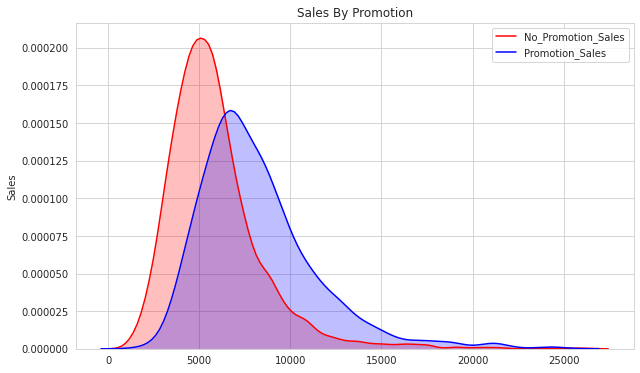

In [51]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(x1, shade=True, color="r")
ax = sns.kdeplot(x2, shade=True, color="b")
plt.title("Sales By Promotion")
plt.ylabel('Sales')

**4. Store Sales Prediction**

In [0]:
dfd = df1.sample(n=50000, random_state=1)

In [0]:
# split features and labels
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [0]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)

In [0]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [0]:
# split training and test datasets
from sklearn.model_selection import train_test_split

#from sklearn.cross_validation import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

**4.1 Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [80]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

print("Training Accuracy" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Testing Accuarcy" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Training Accuracy : 0.7534426463092014 , Testing Accuarcy : 0.7374031695181285
Training RMSE : 1558.666986443433 Testing RMSE : 1569.7998978110754
Training MAPE : 16.994613661283044 Testing MAPE : 17.223983944754266


**4.2 Random Forest Regression**

In [0]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [82]:
print("Training Accuracy" , ":" , rdfreg.score(xl_train, yl_train) , "," ,
      "Testing Accuracy" ,":" , rdfreg.score(xl_test, yl_test))   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Training Accuracy : 0.9780625035557274 , Testing Accuracy : 0.840880217880209
Training RMSE : 464.9303406719477 Testing RMSE : 1221.9730961039108
Training MAPE : 4.769141738115451 Testing MAPE : 12.607426476138588


**4.3 K-Nearest Neighbors Regression**

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(xd_train, yd_train)

In [84]:
print("Training Accuracy" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Testing Accuracy" ,":" , knnreg.score(xd_test, yd_test))

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Training Accuracy : 0.6275761316749886 , Testing Accuracy : 0.57616778527949
Training RMSE : 1915.6365301074293 Testing RMSE : 1994.3277777509113
Training MAPE : 22.923501535229647 Testing MAPE : 23.86797893442435


In [85]:
for x in range(1,15):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

Regresion Model Score : 1.0 , Out of Sample Test Score : 0.2568662059879595
Regresion Model Score : 0.8260507138458782 , Out of Sample Test Score : 0.42427432580945346
Regresion Model Score : 0.7624912347255007 , Out of Sample Test Score : 0.4862514313830809
Regresion Model Score : 0.7295685142655963 , Out of Sample Test Score : 0.5118785656033964
Regresion Model Score : 0.7083883488235312 , Out of Sample Test Score : 0.5316238924579666
Regresion Model Score : 0.6921137957106409 , Out of Sample Test Score : 0.5420025256528676
Regresion Model Score : 0.6819028242731748 , Out of Sample Test Score : 0.5474864389769398
Regresion Model Score : 0.6737819470988362 , Out of Sample Test Score : 0.5529378320048752
Regresion Model Score : 0.6679587864018279 , Out of Sample Test Score : 0.5579367597393575
Regresion Model Score : 0.6616134612124918 , Out of Sample Test Score : 0.5618922745198187
Regresion Model Score : 0.6561654273732106 , Out of Sample Test Score : 0.5635035948021927
Regresion Mod

**Among Linear Regression(OLS), Random Forest and KNN. Random Forest Model Performed better.**

**Feature Importance**

Text(0.5, 0, 'Relative Importance')

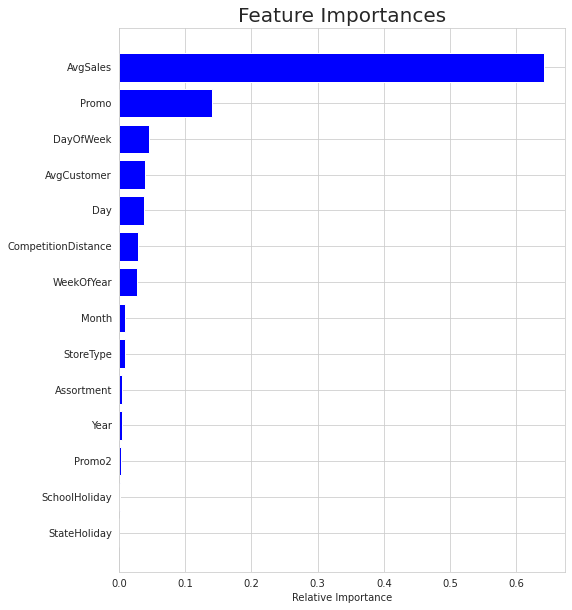

In [86]:
features = xl_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')